# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression
import random
random.seed(10)

In [2]:
df = pd.read_csv('pivot_final_2.csv',index_col=[0])

# Acquire
> * Data acquired from:
    - https://overthecap.com/position/quarterback
    - https://overthecap.com/contract-history/quarterback
    - https://nextgenstats.nfl.com/stats/passing/2022/REG/all#yards
    - https://www.pro-football-reference.com/years/2022/passing.htm
> * Combined multiple csv's and added additionals column to give percentage of wins and losses
> * Cached combined file to local csv
> * Each row player stats throughout a specific year

# Prepare
> * Visualized full dataset for univariate exploration
      * Histograms different types of distributions

> * Verified datatypes
> * Corrected column names
> * Checked for nulls and removed them
> * Split the data, stratifying on target variable

In [3]:
df.head()

,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,...,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss
name,,,,,,,,,,,,,,,,,,,,,
Rex Grossman,WAS,2010,4.0,74.0,133.0,55.6,884.0,6.6,7.0,4.0,...,42,64,11.9,221.0,33.000000,9,0.0,1.0,1,2
Rex Grossman,WAS,2011,13.0,265.0,458.0,57.9,3148.0,6.9,16.0,20.0,...,161,51,11.9,242.4,41.500000,25,2.0,2.0,5,8
Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,...,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3
Matt Flynn,GB,2013,7.0,124.0,200.0,62.0,1392.0,7.0,8.0,5.0,...,0,56,11.2,198.9,52.597577,24,3.0,2.0,2,3
Jameis Winston,TB,2015,16.0,312.0,535.0,58.3,4042.0,7.6,22.0,15.0,...,201,68,13.0,252.6,57.200000,27,2.0,3.0,6,10


In [4]:
train, validate, test = wrangle.split_data(df)
columns_list, target, corr_test = wrangle.get_target_and_columns(df, train)

# Univariate Analysis

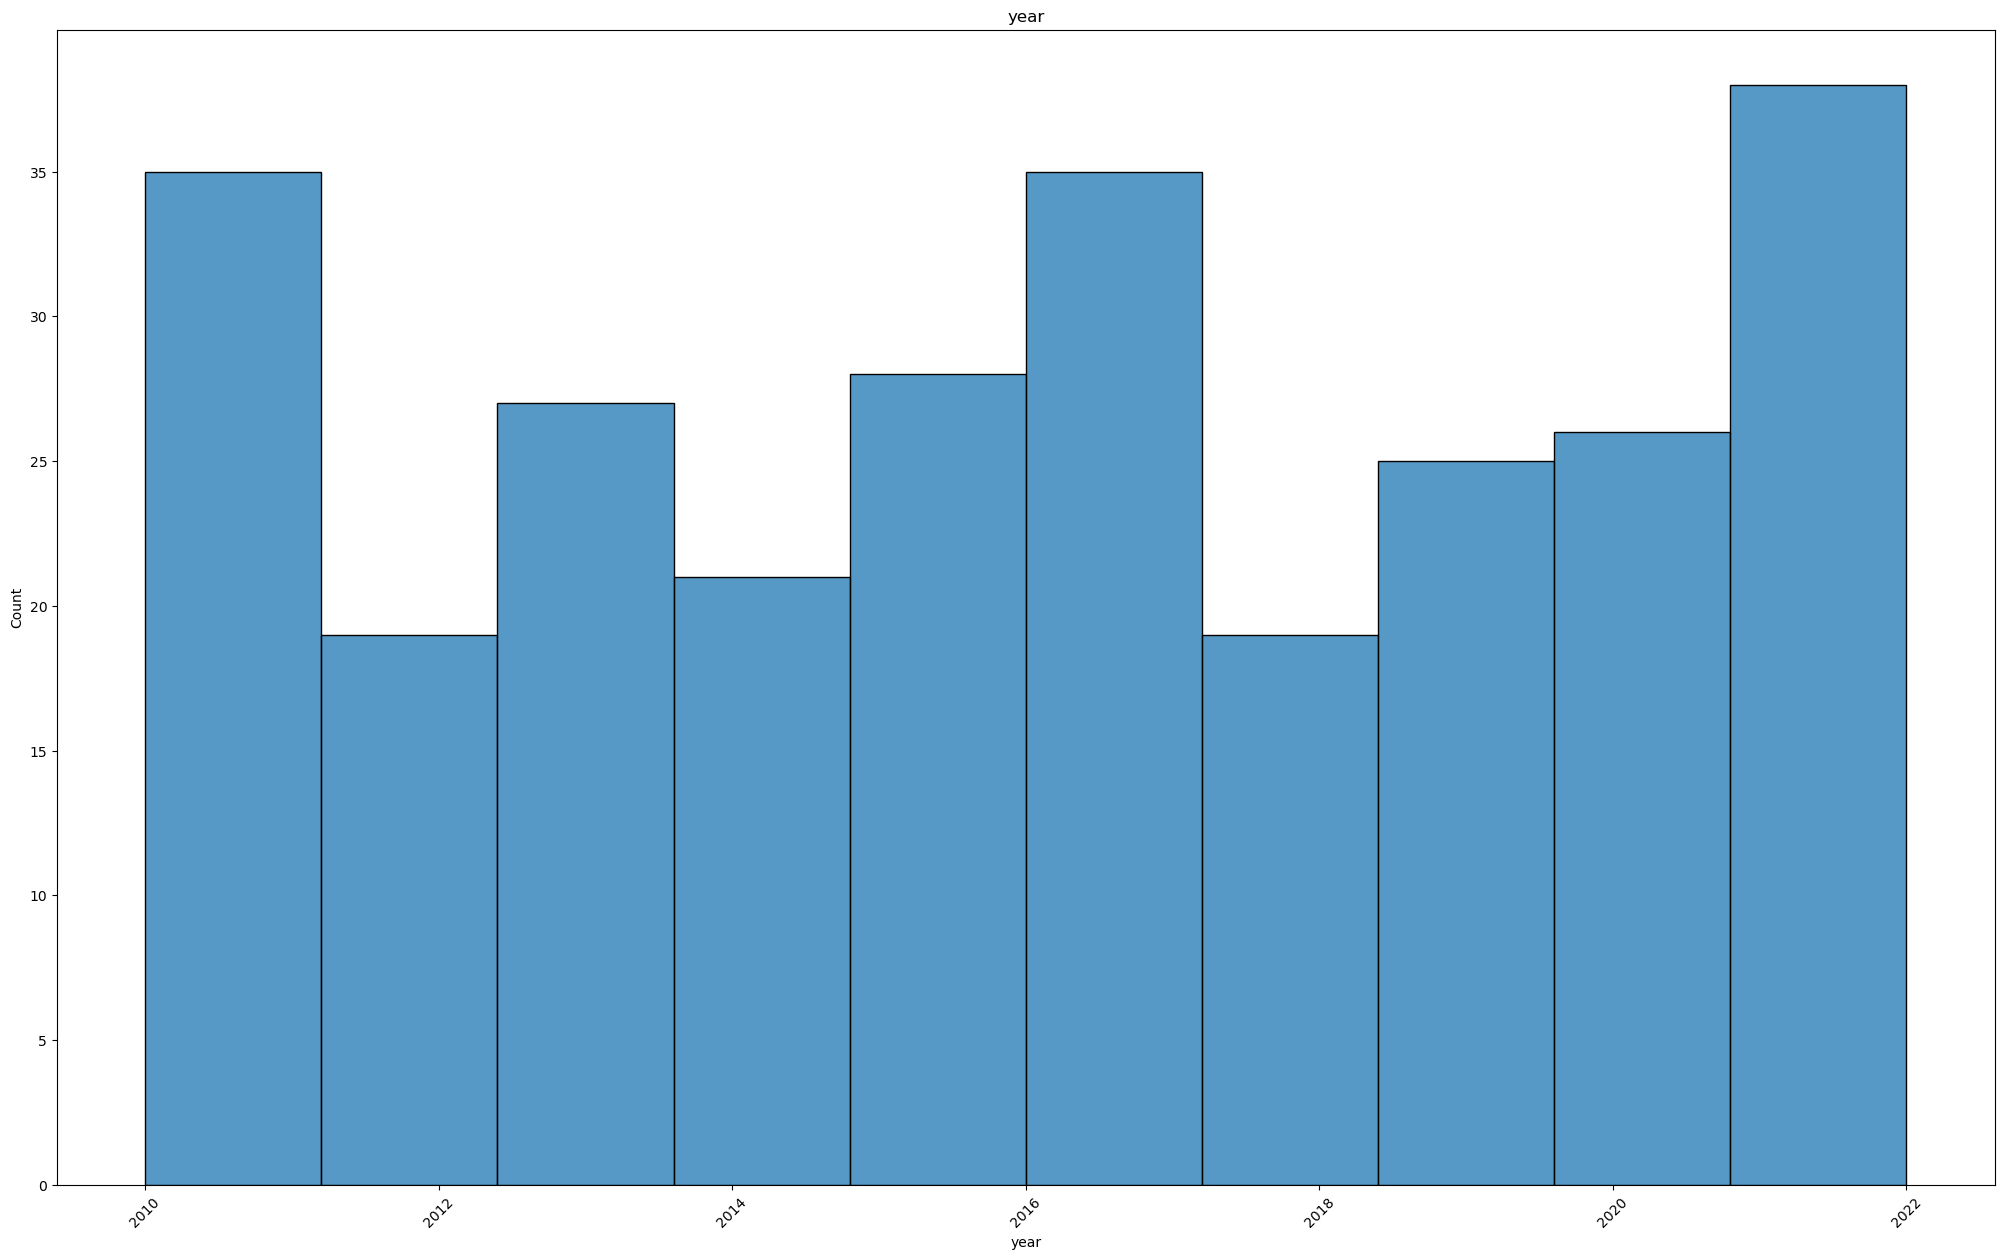

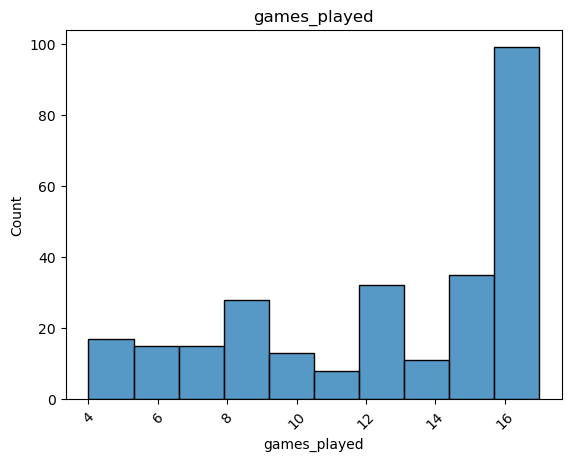

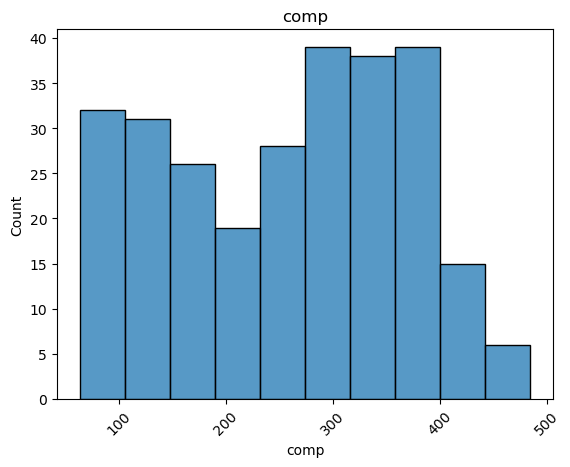

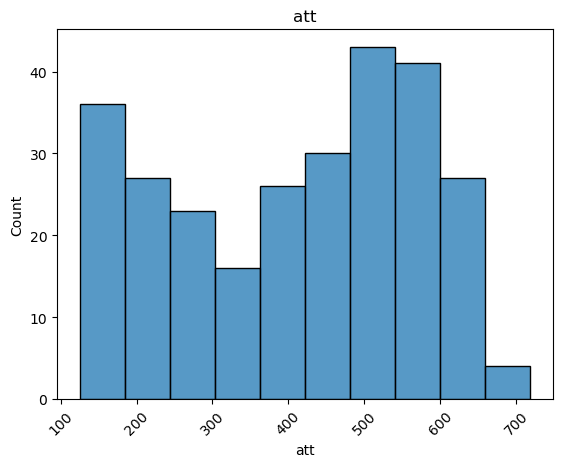

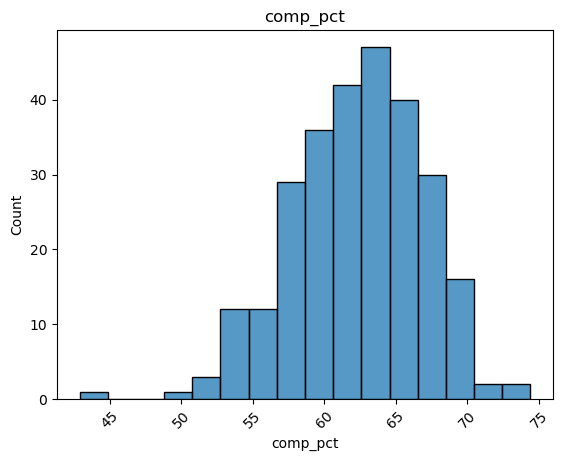

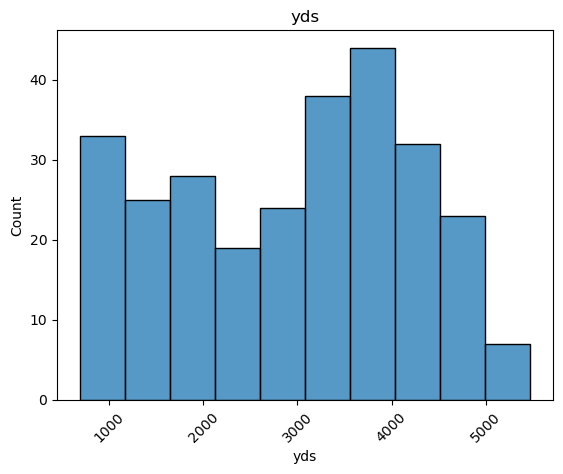

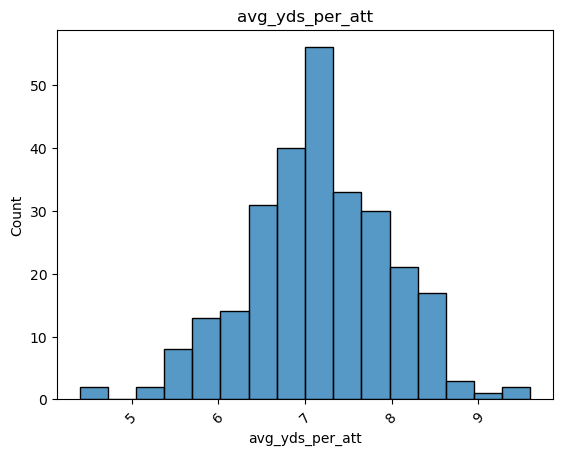

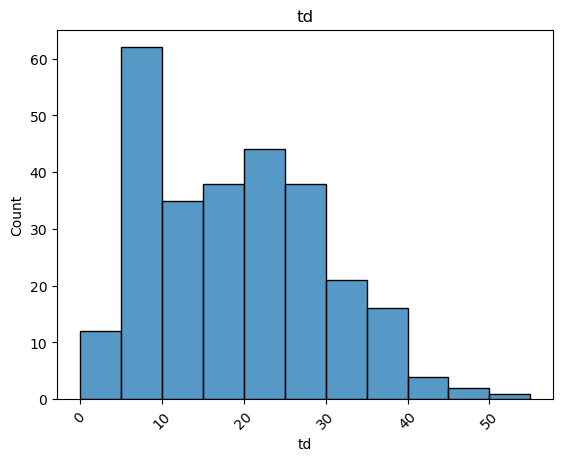

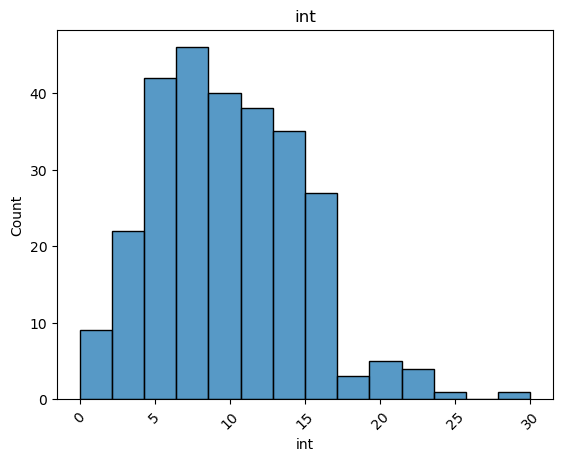

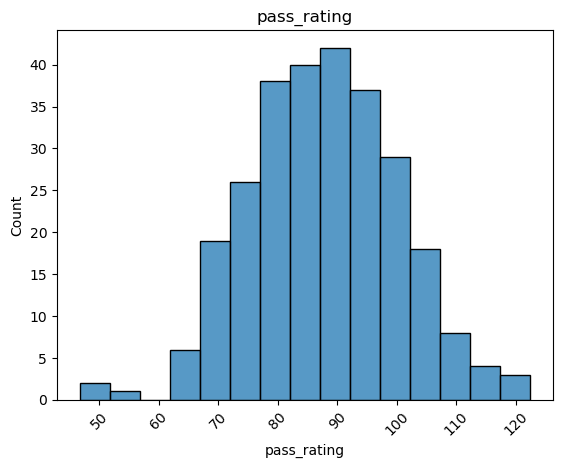

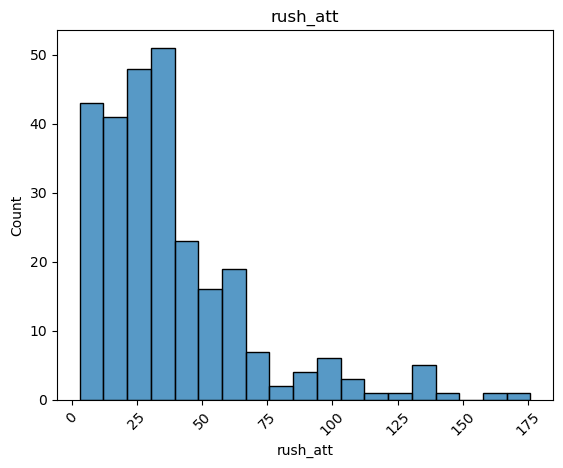

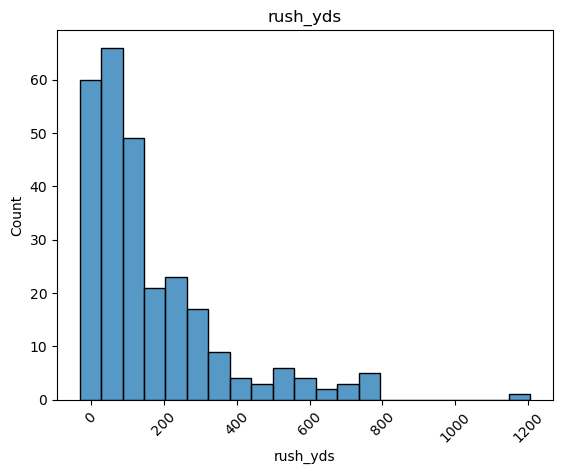

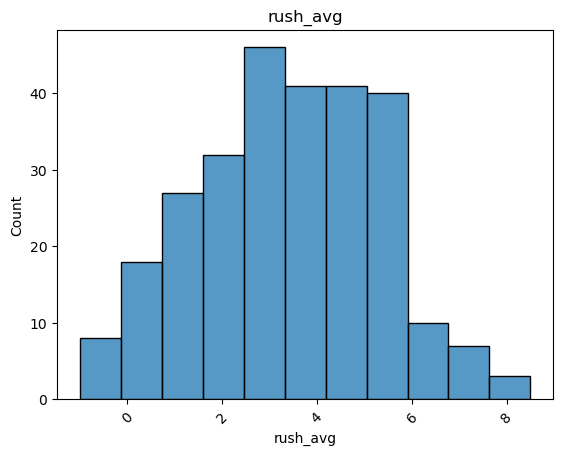

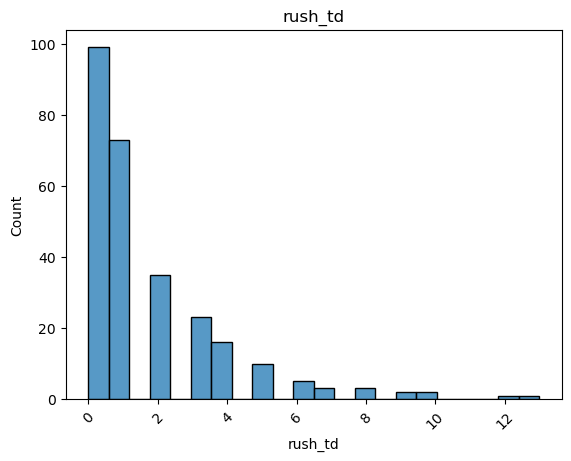

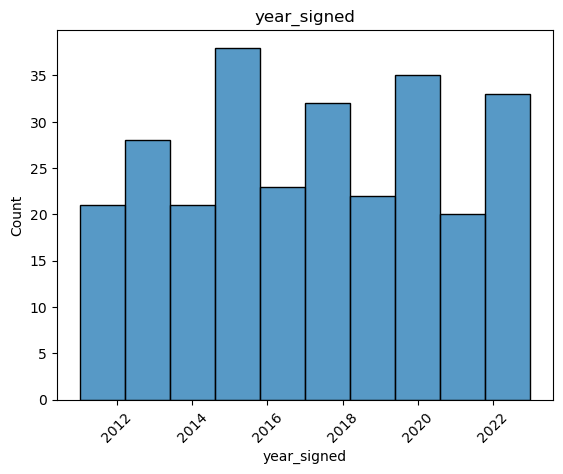

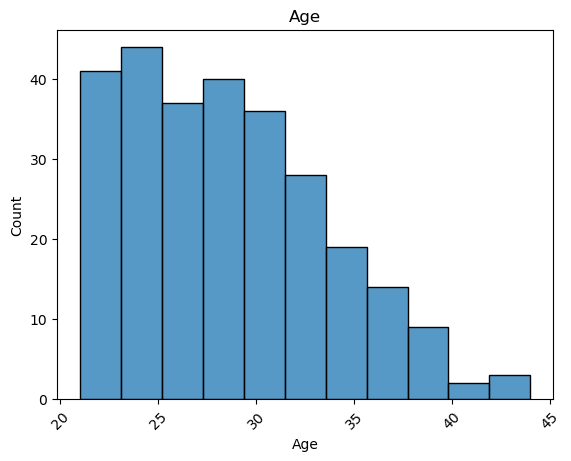

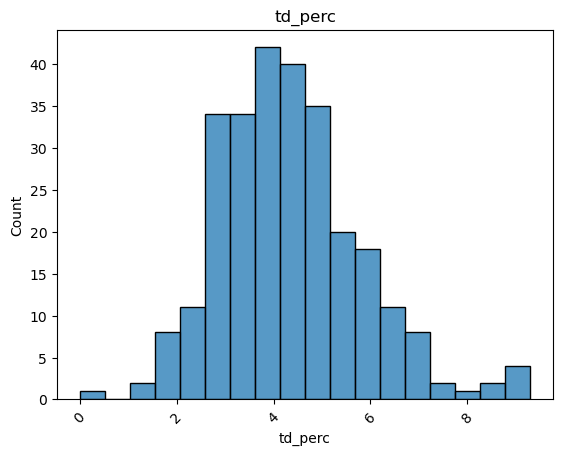

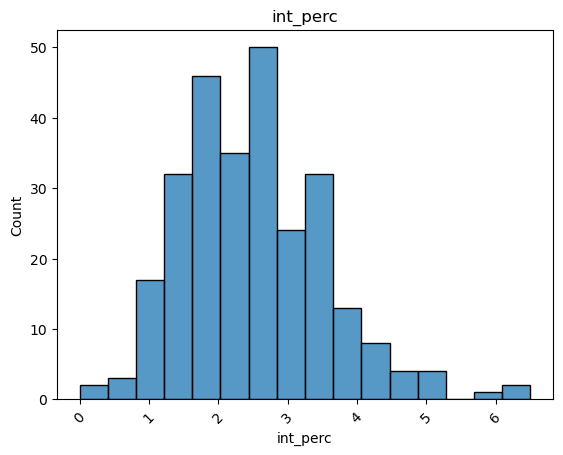

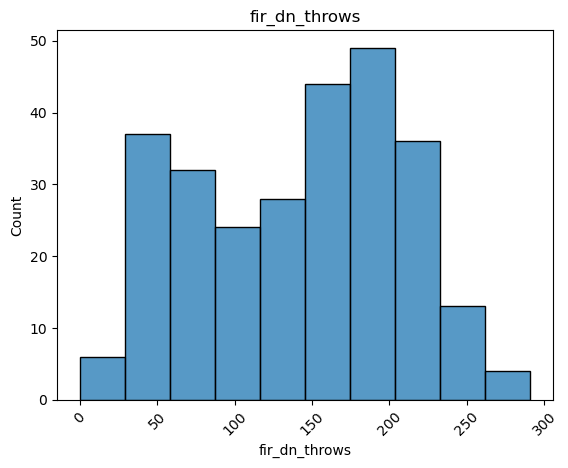

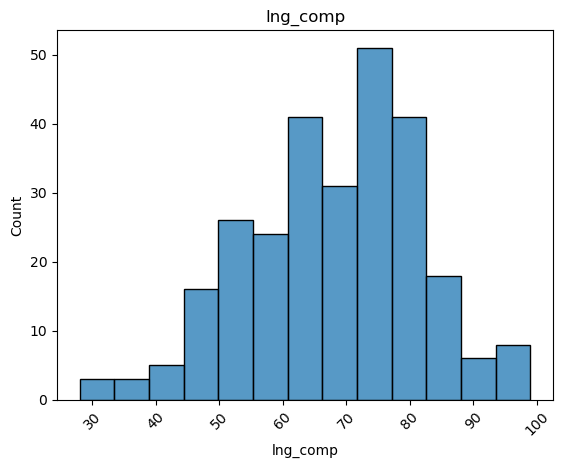

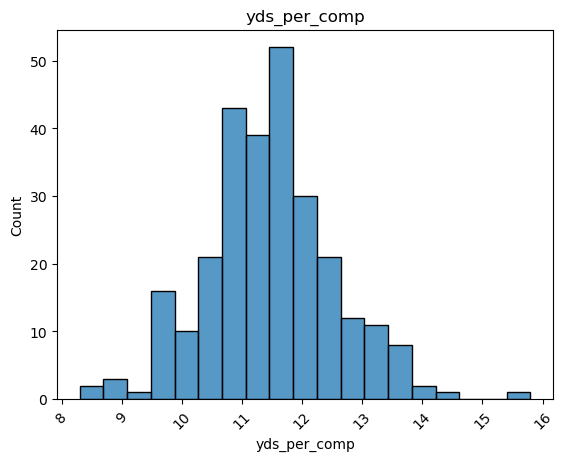

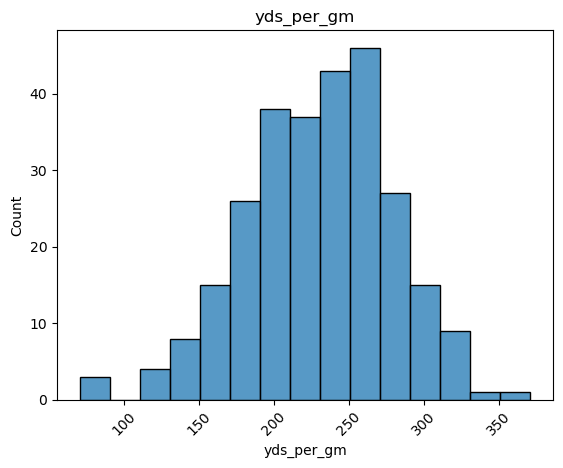

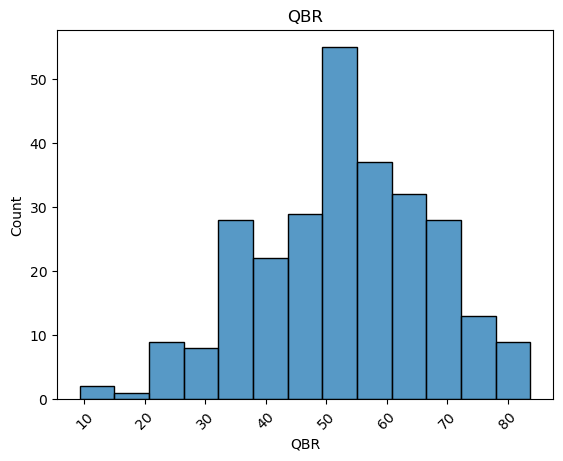

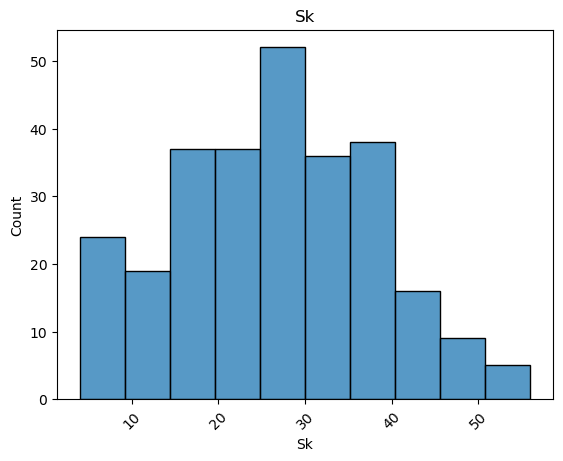

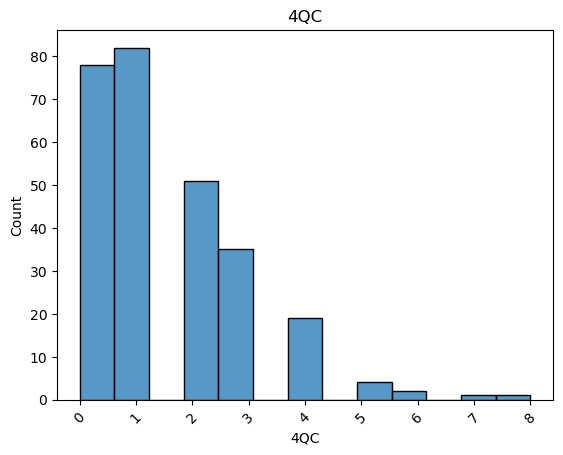

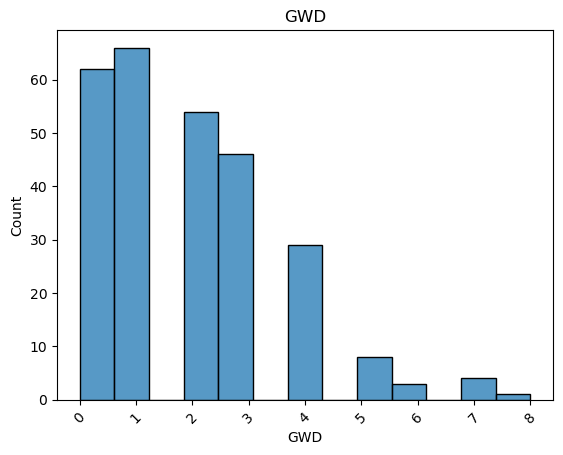

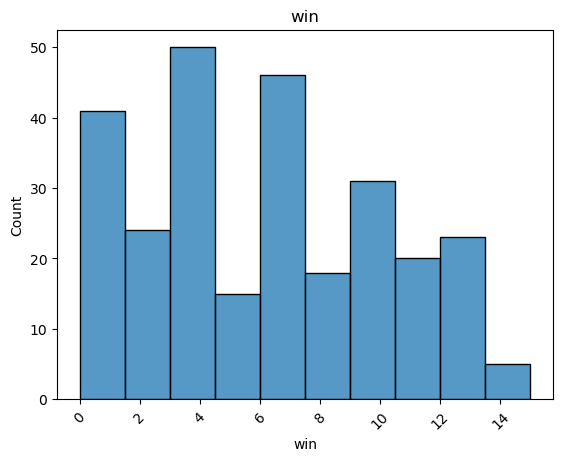

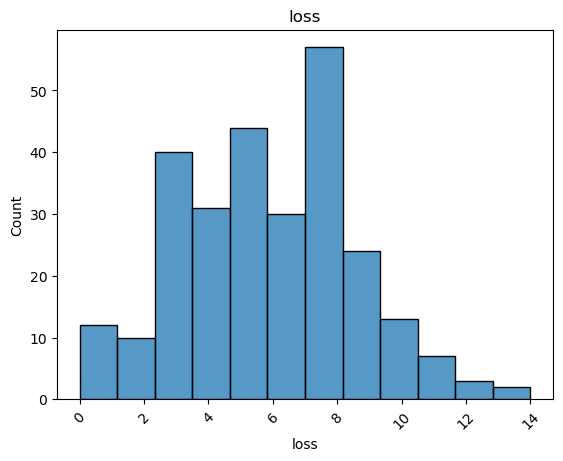

In [5]:
wrangle.univariate_visual(train[columns_list])

In [6]:
wrangle.univariate_findings()

# Univariate Exploration Summary


# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

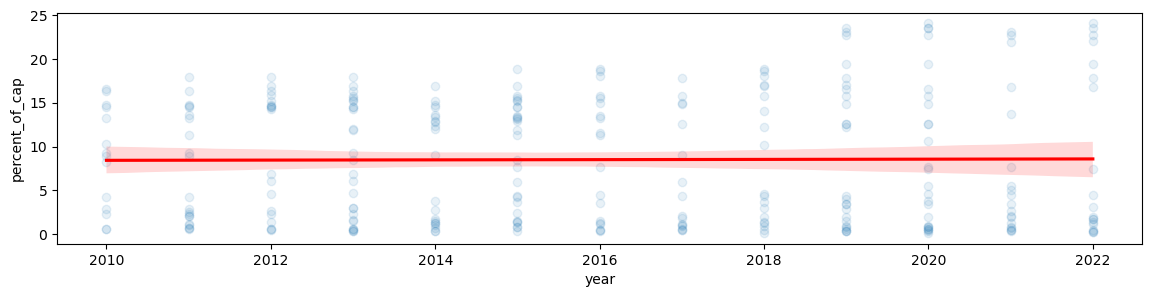

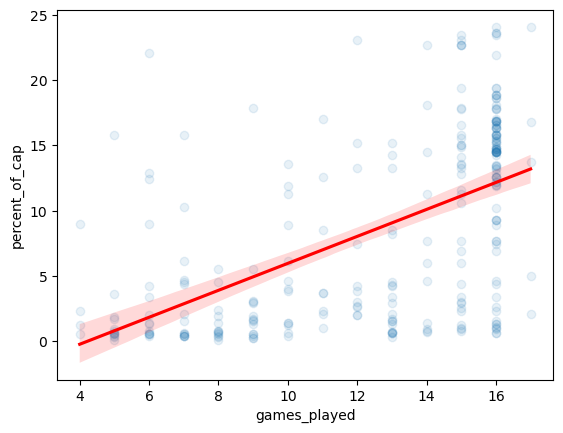

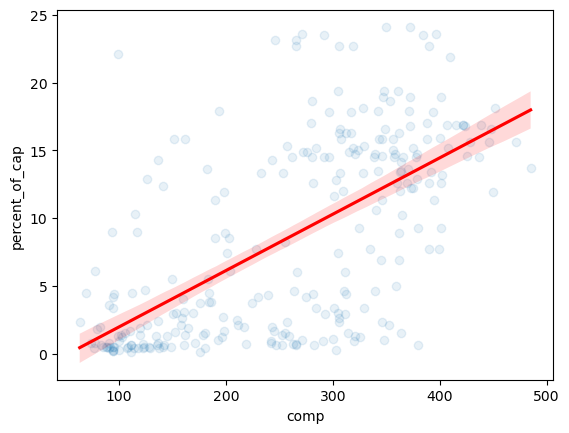

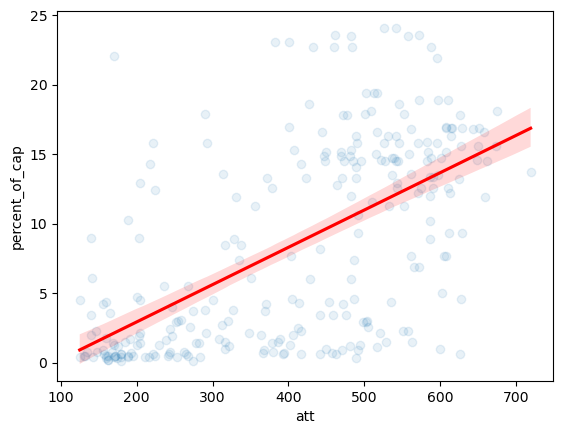

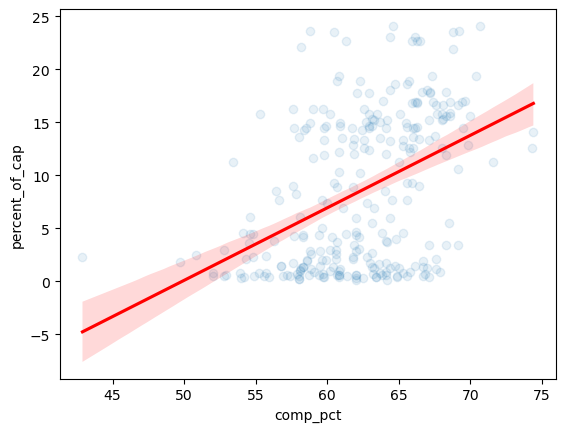

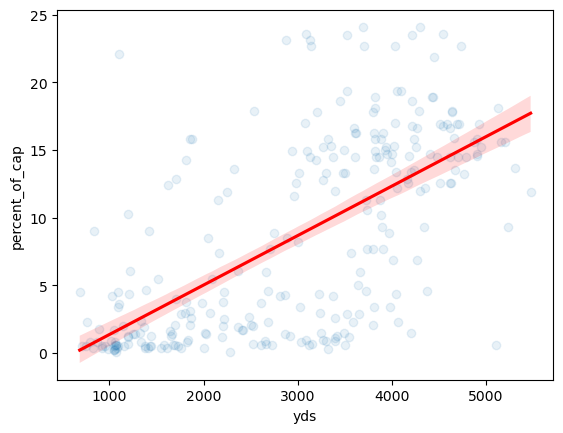

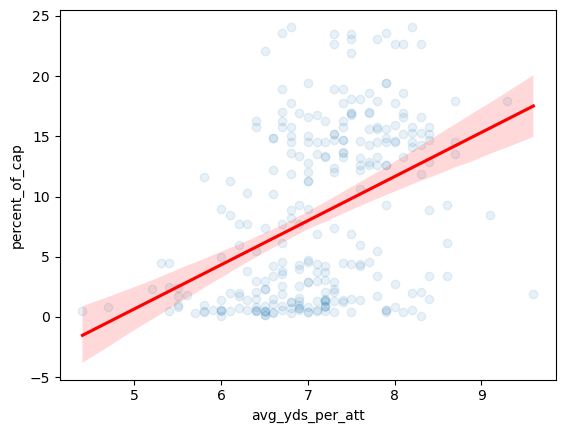

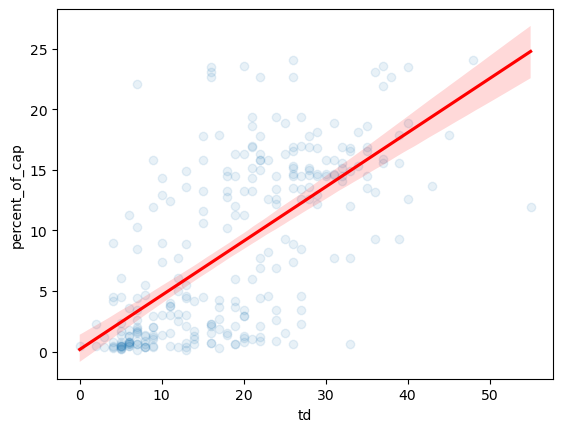

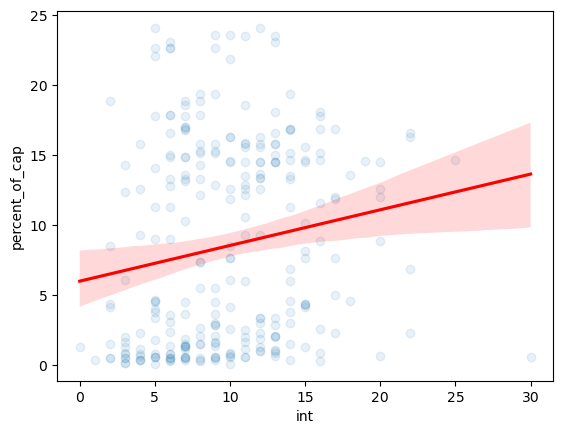

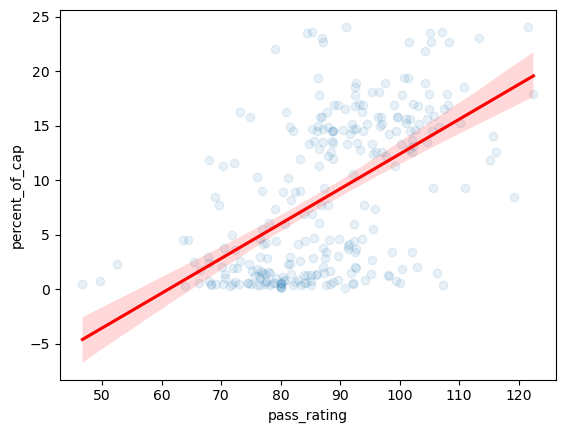

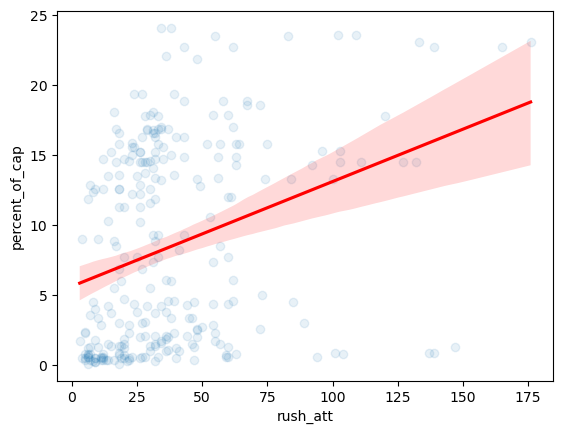

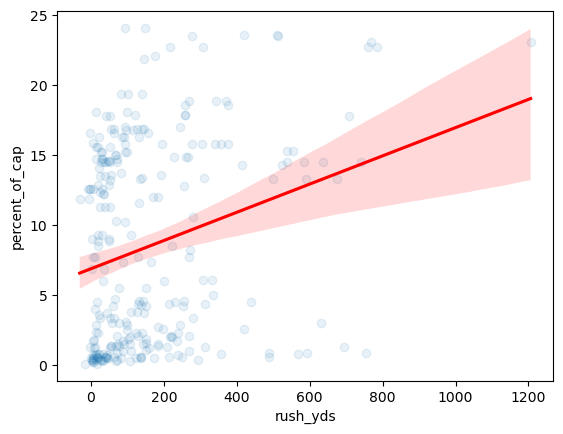

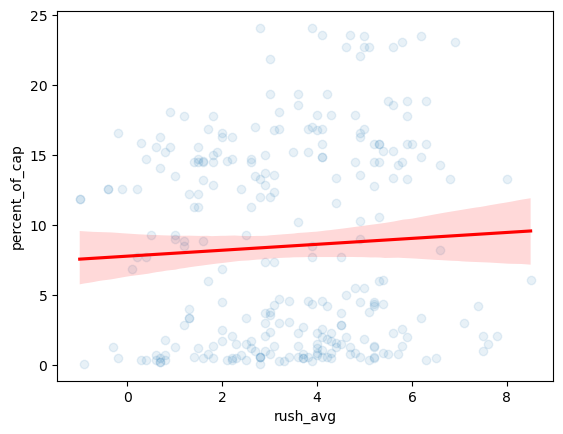

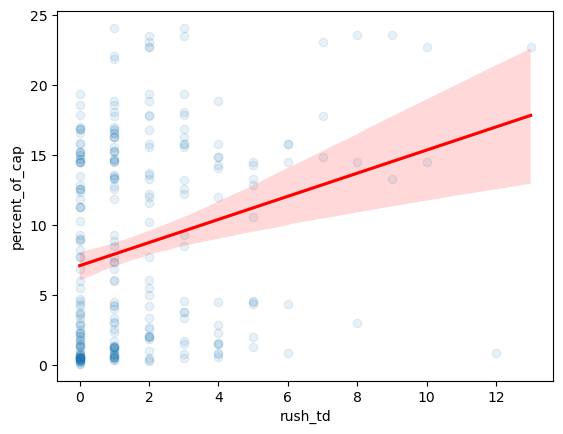

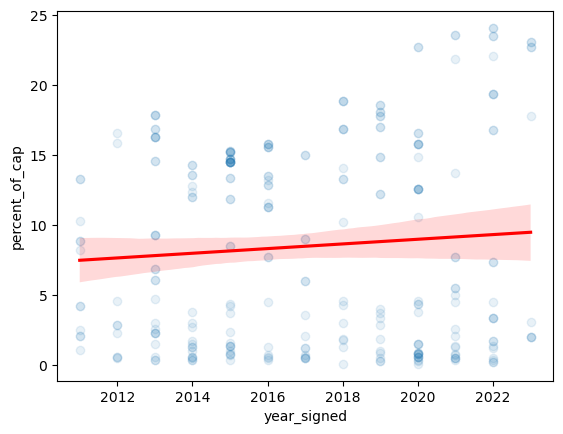

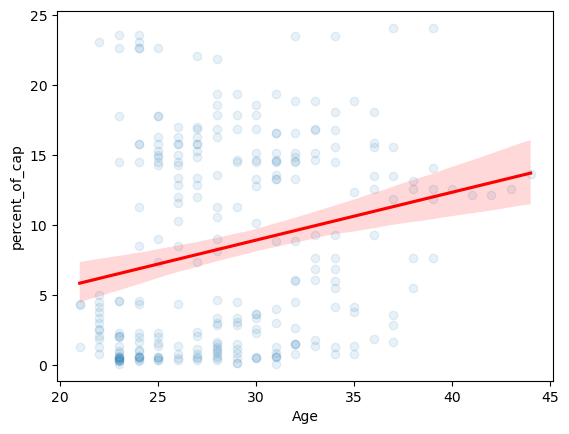

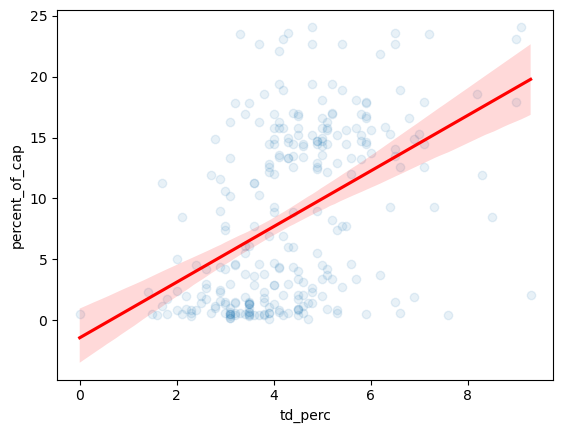

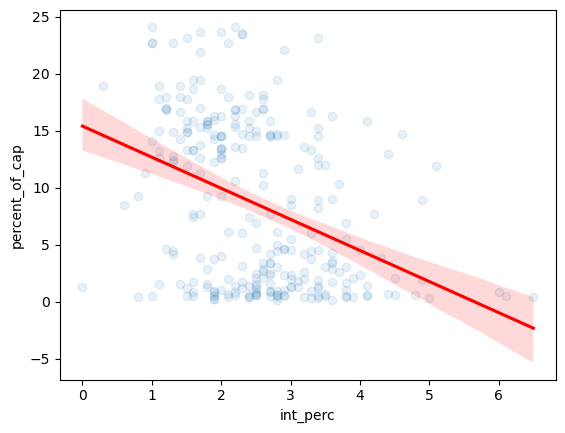

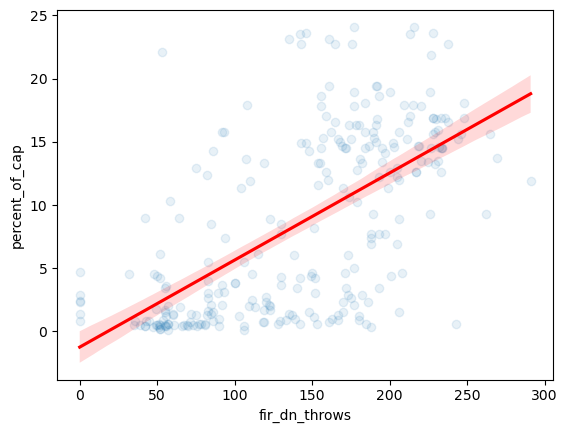

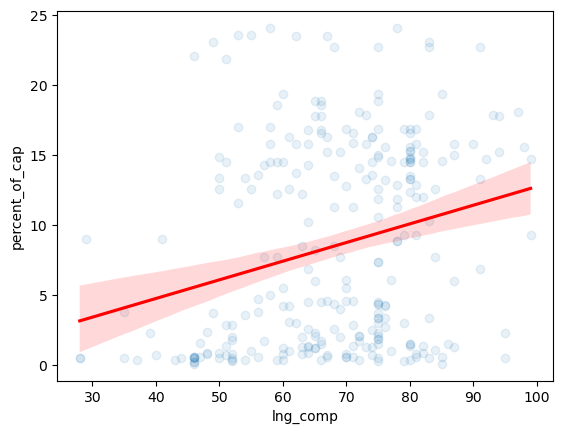

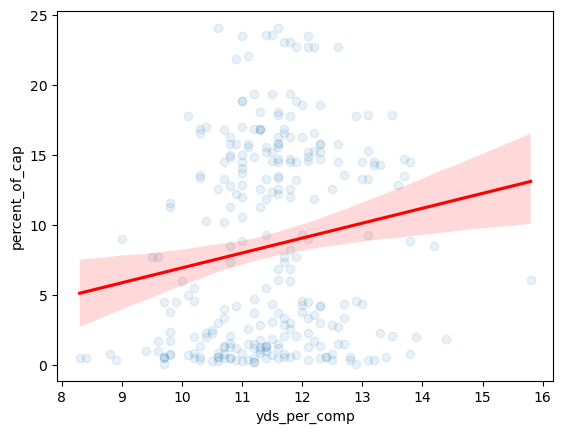

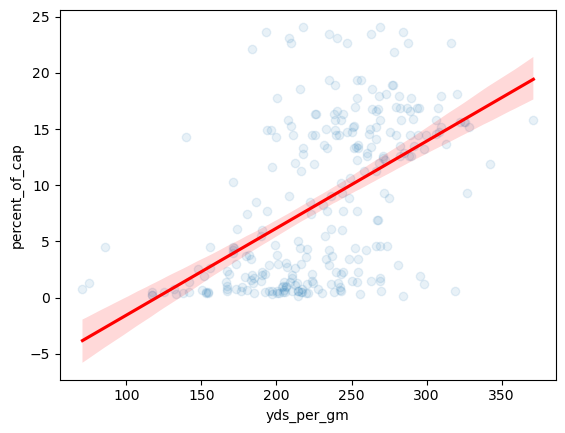

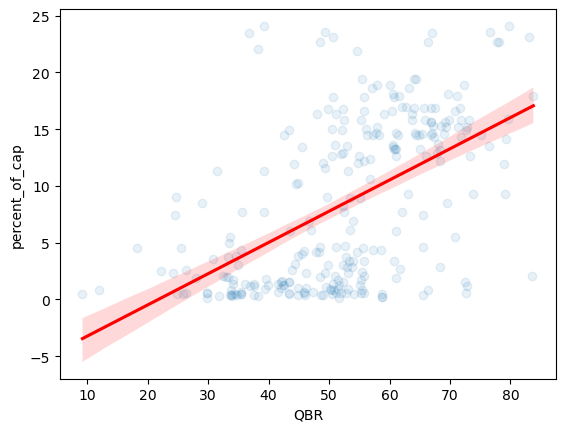

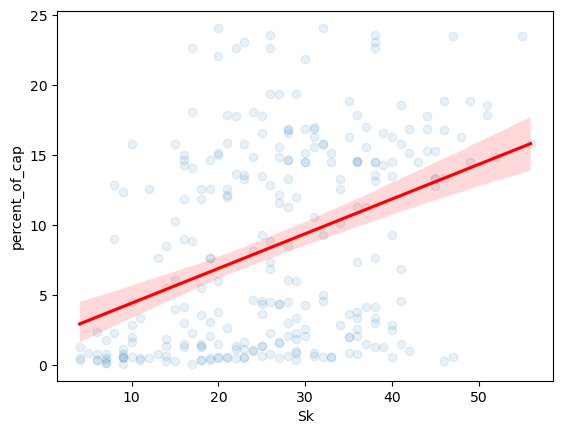

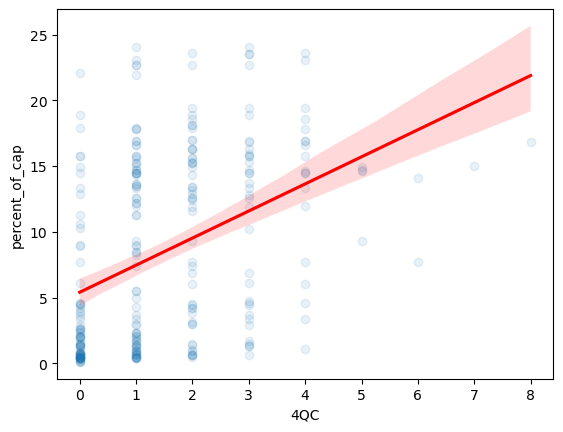

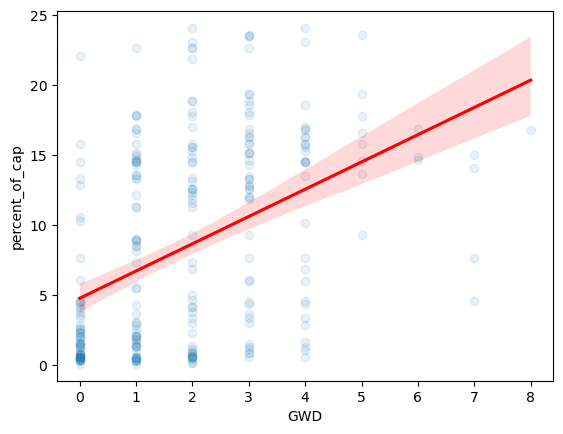

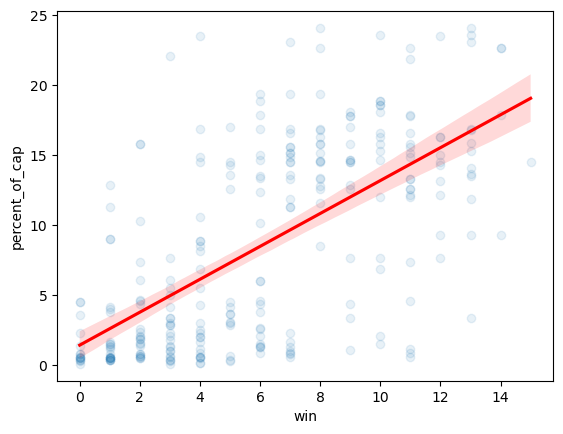

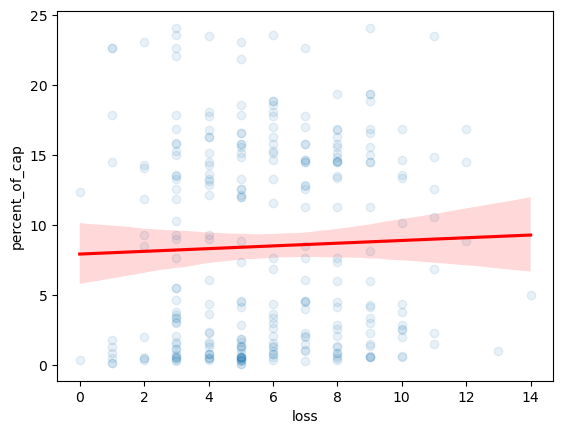

In [7]:
wrangle.correlation_charts(train,columns_list , target)

# Bivariate Exploration Summary


In [8]:
wrangle.get_explore_data(columns_list, corr_test)

,Features,Correlation,Moving Forward
0,year,Positive,No
1,games_played,Positive,No
2,comp,Positive,No
3,att,Positive,No
4,comp_pct,Positive,Yes
5,yds,Positive,Yes
6,avg_yds_per_att,Positive,Yes
7,td,Positive,Yes
8,int,Positive,Yes
9,pass_rating,Positive,Yes


# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [9]:
corr_test

,feature,r,p,target
0,year,0.006710,9.121200e-01,percent_of_cap
1,loss,0.036330,5.500320e-01,percent_of_cap
2,rush_avg,0.056621,3.513432e-01,percent_of_cap
3,year_signed,0.078675,1.949876e-01,percent_of_cap
4,yds_per_comp,0.160567,7.858379e-03,percent_of_cap
5,int,0.168108,5.357601e-03,percent_of_cap
6,Age,0.229162,1.334715e-04,percent_of_cap
7,rush_td,0.254040,2.156294e-05,percent_of_cap
8,lng_comp,0.254958,2.008529e-05,percent_of_cap
9,rush_yds,0.259872,1.367403e-05,percent_of_cap


In [10]:
columns_list = corr_test.feature[corr_test.p < .05].to_list()

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with

In [11]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

,feature,r,p,target
0,td,0.659486,1.881538e-35,percent_of_cap
1,yds,0.646075,1.199544e-33,percent_of_cap
2,win,0.645542,1.408810e-33,percent_of_cap
3,comp,0.630652,1.110033e-31,percent_of_cap
4,fir_dn_throws,0.624198,6.851105e-31,percent_of_cap
5,att,0.602152,2.521559e-28,percent_of_cap
6,games_played,0.562537,3.491778e-24,percent_of_cap
7,pass_rating,0.555235,1.766582e-23,percent_of_cap
8,QBR,0.540854,3.839260e-22,percent_of_cap
9,yds_per_gm,0.531218,2.785622e-21,percent_of_cap


In [12]:
# splitting the data in its respective catagory
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [13]:
# Scaling on selected features to be sent into model
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

In [14]:
# Running the data through the models
df1, df2, df3 = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

## Train Data

In [15]:
# Models on the training data
df1

,model_train,rmse,r2
0,baseline,7.175664,0.000000
1,ordinary least squared(OLS),4.670966,0.576270
2,lasso lars(lars),6.597912,0.154548
3,Polynomial Regression(poly2),0.074290,0.999893
4,Generalized Linear Model (GLM),5.705122,0.367871


## Validate Data

In [16]:
# Models on the validate data
df2

,model_validate,rmse,r2
0,baseline,7.175664e+00,0.000000e+00
1,ordinary least squared(OLS),5.479861e+00,3.677999e-01
2,lasso lars(lars),6.507307e+00,1.085069e-01
3,Polynomial Regression(poly2),3.476783e+07,-2.544899e+13
4,Generalized Linear Model (GLM),5.874301e+00,2.735131e-01


## Test Data

In [17]:
# Model on the unseen test data
df3.iloc[1].reset_index()

,index,1
0,model_validate,ordinary least squared(OLS)
1,rmse,4.334079
2,r2,0.59819


In [18]:
# Running the data through the models with the new train, test method.
master_df,best_parameters = wrangle.run_fold(df, columns_list, target)

In [19]:
master_df

,alpha,fit_intercept,verbose,score,model,n_jobs,link
2,1.0,False,True,5.247679,lars,NaN,NaN
3,1.0,False,False,5.247679,lars,NaN,NaN
0,1.0,True,True,5.249239,lars,NaN,NaN
1,1.0,True,False,5.249239,lars,NaN,NaN
4,2.0,True,True,5.359859,lars,NaN,NaN
5,2.0,True,False,5.359859,lars,NaN,NaN
6,2.0,False,True,5.360309,lars,NaN,NaN
7,2.0,False,False,5.360309,lars,NaN,NaN
8,3.0,True,True,5.426668,lars,NaN,NaN
9,3.0,True,False,5.426668,lars,NaN,NaN


In [20]:
# Running the test data through the models
best_parameters

,model_validate,rmse,r2
0,baseline,7.173190,0.000000
1,lasso lars(lars),4.368104,0.573262


# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 5.479861e+00 in validate
> - Our unseen test data beat baseline

# Conclusion

> - The different columns were distributed in differently see above for a chart

### Features that were statistically significant

In [ ]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback